# Dataset Installing 

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV


In [159]:
previousDF = pd.read_csv('previous_application.csv',nrows=100000)
pd.set_option('display.max_columns',37)
display(previousDF.head())


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
applicationDF = pd.read_csv('application_data.csv',nrows=100000)
pd.set_option('display.max_columns',122)
display(applicationDF.head())


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [161]:
#Displaying 'columns_description.csv' dataset as a dataframe

columns_dscrip =  pd.read_csv('columns_description.csv')
pd.set_option('display.max_rows',160)
pd.set_option('display.max_columns',5)
pd.set_option('display.max_colwidth',None)
display(columns_dscrip)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


- Combining data from different sources (df1 and df2) into a single, unified dataset that can be used for analysis, training machine learning models, and making predictions.

In [162]:
#merge the 'NFLAG_INSURED_ON_APPROVAL' column from df into df2 based on the 'SK_ID_CURR' column

merged_df =pd.merge(applicationDF, previousDF[['SK_ID_CURR','NFLAG_INSURED_ON_APPROVAL']], how='inner',on='SK_ID_CURR', suffixes=('','y'))
pd.set_option('display.max_columns',158)
display(merged_df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NFLAG_INSURED_ON_APPROVAL
0,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial ass

- Load the dataset into the notebook.
- Explore the data to understand its structure, missing values, and distributions.
- Handle missing values by imputation or removal.
- Encode categorical variables and scale numerical features if necessary.
- Handling class imbalance

In [7]:

#Handling missing values
missing_value_df= merged_df.copy()

#Change 'NFLAG_INSURED_ON_APPROVAL' from binary into 'yes' and 'no' to apply most_frequent imputation

binary_values= missing_value_df['NFLAG_INSURED_ON_APPROVAL']
label_encoder= LabelEncoder()
encoded_values=label_encoder.fit_transform(binary_values)

decoded_values=[]
for value in encoded_values:
    if value==1:
        decoded_values.append('Y')
    elif value==0:
        decoded_values.append('N')
    else:
        decoded_values.append(np.nan)

#replace binary values with categorical decoded values in 'NFLAG_INSURED_ON_APPROVAL' dataframe
missing_value_df['NFLAG_INSURED_ON_APPROVAL']=decoded_values


#Apply imputation; mean for numeric and most_frequesnt for catagorical features

numeric_columns= missing_value_df.select_dtypes(include=[np.number]).columns    
categorical_columns = missing_value_df.select_dtypes(include=[object]).columns 

imputer_numeric= SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

missing_value_df[numeric_columns]= imputer_numeric.fit_transform(missing_value_df[numeric_columns])
missing_value_df[categorical_columns]= imputer_categorical.fit_transform(missing_value_df[categorical_columns])


#Encoding 'previous_application.csv'
encoded_df= missing_value_df.copy()

# with label encoder
label_enc=['NAME_CONTRACT_TYPE','NFLAG_INSURED_ON_APPROVAL','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE']
label_encoder = LabelEncoder()

for column in label_enc:
    encoded_value= label_encoder.fit_transform(encoded_df[column])
    encoded_df[column]= encoded_value

#with ordinal encoder
display(encoded_df.head()) 
all_mapping={'WEEKDAY_APPR_PROCESS_START':{'MONDAY':0, 'TUESDAY':1, 'WEDNESDAY': 2, 'THURSDAY':3, 'FRIDAY':4, 'SATURDAY':5, 'SUNDAY':6},'CODE_GENDER':{'F':0,'M':1,'XNA':2},'FLAG_OWN_CAR':{'N':0,'Y':1},'FLAG_OWN_REALTY':{'N':0,'Y':1},'NAME_EDUCATION_TYPE':{'Lower secondary':0,'Secondary / secondary special':1,'Incomplete higher':2,'Higher education':3,'Academic degree':4},'EMERGENCYSTATE_MODE':{'No':0, 'Yes':1}}

for column in all_mapping:
    mapping = all_mapping[column]
    ordinal_encoder = OrdinalEncoder(categories =[list(mapping.keys())])
    encoded_df[column] = ordinal_encoder.fit_transform(encoded_df[[column]])
    
display(encoded_df.head())  


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NFLAG_INSURED_ON_APPROVAL
0,100006.0,0.0,0,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,6,4,Secondary / secondary special,0,1,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,12.08428,1.0,1.0,0.0,1.0,0.0,0.0,8,2.0,2.0,2.0,WEDNESDAY,17.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.508259,0.650442,0.492407,0.115696,0.087674,0.976672,0.750371,0.045423,0.07586,0.150014,0.223359,0.229349,0.065946,0.099532,0.105383,0.008452,0.02709,0.112621,0.086972,0.976053,0.757856,0.043426,0.071722,0.145401,0.219577,0.225701,0.064636,0.104287,0.104294,0.007877,0.025808,0.115967,0.087226,0.976627,0.753744,0.045507,0.074988,0.14936,0.223043,0.229235,0.06685,0.100553,0.106534,0.008375,0.027101,2,0,0.101235,4,No,2.0,0.0,2.0,0.0,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005943,0.007346,0.036855,0.305035,0.348783,2.868882,0
1,100007.0,0.0,0,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,6,4,Secondary / secondary special,3,1,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,12.08428,1.0,1.0,0.0,1.0,0.0,0.0,3,1.0,2.0,2.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,36,0.508259,0.322738,0.492407,0.115696,0.087674,0.976672,0.750371,0.045423,0.07586,0.150014,0.223359,0.229349,0.065946,0.099532,0.105383,0.008452,0.02709,0.112621,0.086972,0.976053,0.757856,0.043426,0.071722,0.145401,0.219577,0.225701,0.064636,0.104287,0.104294,0.007877,0.025808,0.115967,0.087226,0.976627,0.753744,0.045507,0.074988,0.14936,0.223043,0.229235,0.06685,0.100553,0.106534,0.008375,0.027101,2,0,0.101235,4,No,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,100007.0,0.0,0,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,6,4,Secondary / secondary special,3,1,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,12.08428,1.0,

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NFLAG_INSURED_ON_APPROVAL
0,100006.0,0.0,0,0.0,0.0,1.0,0.0,135000.0,312682.5,29686.5,297000.0,6,4,1.0,0,1,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,12.08428,1.0,1.0,0.0,1.0,0.0,0.0,8,2.0,2.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.508259,0.650442,0.492407,0.115696,0.087674,0.976672,0.750371,0.045423,0.07586,0.150014,0.223359,0.229349,0.065946,0.099532,0.105383,0.008452,0.02709,0.112621,0.086972,0.976053,0.757856,0.043426,0.071722,0.145401,0.219577,0.225701,0.064636,0.104287,0.104294,0.007877,0.025808,0.115967,0.087226,0.976627,0.753744,0.045507,0.074988,0.14936,0.223043,0.229235,0.06685,0.100553,0.106534,0.008375,0.027101,2,0,0.101235,4,0.0,2.0,0.0,2.0,0.0,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005943,0.007346,0.036855,0.305035,0.348783,2.868882,0
1,100007.0,0.0,0,1.0,0.0,1.0,0.0,121500.0,513000.0,21865.5,513000.0,6,4,1.0,3,1,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,12.08428,1.0,1.0,0.0,1.0,0.0,0.0,3,1.0,2.0,2.0,3.0,11.0,0.0,0.0,0.0,0.0,1.0,1.0,36,0.508259,0.322738,0.492407,0.115696,0.087674,0.976672,0.750371,0.045423,0.07586,0.150014,0.223359,0.229349,0.065946,0.099532,0.105383,0.008452,0.02709,0.112621,0.086972,0.976053,0.757856,0.043426,0.071722,0.145401,0.219577,0.225701,0.064636,0.104287,0.104294,0.007877,0.025808,0.115967,0.087226,0.976627,0.753744,0.045507,0.074988,0.14936,0.223043,0.229235,0.06685,0.100553,0.106534,0.008375,0.027101,2,0,0.101235,4,0.0,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,100007.0,0.0,0,1.0,0.0,1.0,0.0,121500.0,513000.0,21865.5,513000.0,6,4,1.0,3,1,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,12.08428,1.0,1.0,0.0,1.0,0.0,0.0,3,1.0,2.0,2.0,3.0,11.0,0.0,0.0,0.0,0.0,1.0,1.0,36

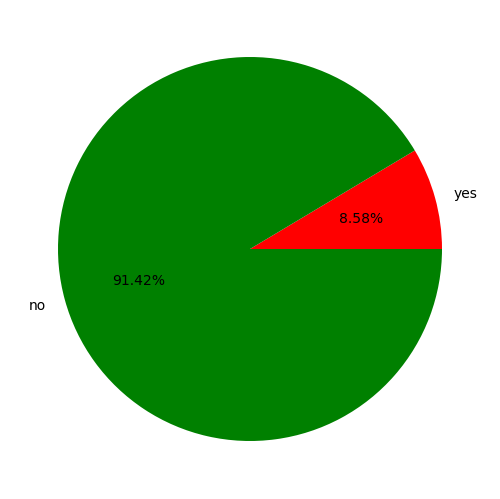

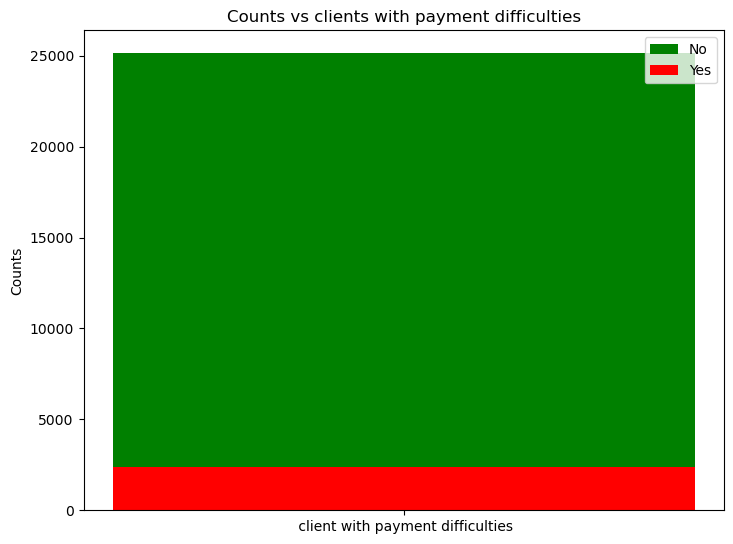

In [8]:
#Checking class imbalance for previous_data.csv

#Pie Chart
approval_counts = []

yes_count = 0
no_count = 0
for count in np.array(encoded_df['TARGET']):
    if count==1.0:
        yes_count+=1
        
approval_counts.append(yes_count)
            
for count in np.array(encoded_df['TARGET']):
        if count==0.0:
            no_count+=1
approval_counts.append(no_count)

fig= plt.figure()
ax=fig.add_axes([0,0,1,1])
loan_approval_label=['yes','no']
colors=['red','green']
ax.pie(approval_counts,labels= loan_approval_label, colors= colors,autopct='%1.2f%%' )
plt.show()

#Bar Graph
approval_counts= (encoded_df['TARGET'].value_counts()).to_dict()

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar([' client with payment difficulties'],approval_counts[0], color='g', label='No')
ax.bar([' client with payment difficulties'],approval_counts[1], color='r', label='Yes')
ax.set_ylabel('Counts')
ax.set_title('Counts vs clients with payment difficulties')
ax.legend()
plt.show()

In [9]:
#Balancing classes
minority_class = encoded_df[encoded_df['TARGET']==1]
majority_class = encoded_df[encoded_df['TARGET']==0]

majority_downsampled= resample(majority_class,
                            replace=False,
                            n_samples = len(minority_class), 
                            random_state=42)

#upsampling the minority class
downsampled_data=pd.concat([majority_downsampled,minority_class])

sorted_df= (downsampled_data.sort_index()).abs()  
display(sorted_df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NFLAG_INSURED_ON_APPROVAL
17,100061.0,0.0,0,0.0,0.0,1.0,2.0,225000.0,314055.0,16164.0,238500.0,6,0,3.0,1,1,0.006629,10473.0,1392.0,2025.0,1240.0,12.08428,1.0,1.0,0.0,1.0,0.0,0.0,3,4.0,2.0,2.0,3.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,41,0.189596,0.702979,0.701696,0.115696,0.087674,0.976672,0.750371,0.045423,0.07586,0.150014,0.223359,0.229349,0.065946,0.099532,0.105383,0.008452,0.02709,0.112621,0.086972,0.976053,0.757856,0.043426,0.071722,0.145401,0.219577,0.225701,0.064636,0.104287,0.104294,0.007877,0.025808,0.115967,0.087226,0.976627,0.753744,0.045507,0.074988,0.14936,0.223043,0.229235,0.06685,0.100553,0.106534,0.008375,0.027101,2,0,0.101235,4,0.0,0.0,0.0,0.0,0.0,570.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0
29,100116.0,0.0,0,0.0,0.0,1.0,0.0,243000.0,900000.0,32017.5,900000.0,6,4,3.0,1,1,0.010006,14751.0,6737.0,3390.0,4788.0,12.08428,1.0,1.0,0.0,1.0,0.0,1.0,3,2.0,2.0,1.0,3.0,11.0,0.0,0.0,0.0,0.0,1.0,1.0,27,0.671272,0.700274,0.071055,0.147400,0.421200,0.997500,0.966000,0.045423,0.12000,0.103400,0.375000,0.375000,0.013500,0.105900,0.186000,0.065600,0.19690,0.150200,0.437100,0.997500,0.967300,0.043426,0.120800,0.103400,0.375000,0.375000,0.013800,0.115700,0.193700,0.066100,0.208400,0.148900,0.421200,0.997500,0.966500,0.045507,0.120000,0.10340,0.375000,0.375000,0.01380,0.107700,0.189300,0.066000,0.201000,3,0,0.217000,5,0.0,2.0,0.0,2.0,0.0,1083.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
34,100151.0,0.0,0,1.0,0.0,0.0,0.0,135000.0,182016.0,11772.0,144000.0,6,0,3.0,3,1,0.019101,16522.0,1451.0,4101.0,66.0,12.08428,1.0,1.0,0.0,1.0,0.0,0.0,0,1.0,2.0,2.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.508259,0.695219,0.729567,0.056700,0.033100,0.979100,0.714400,0.020800,0

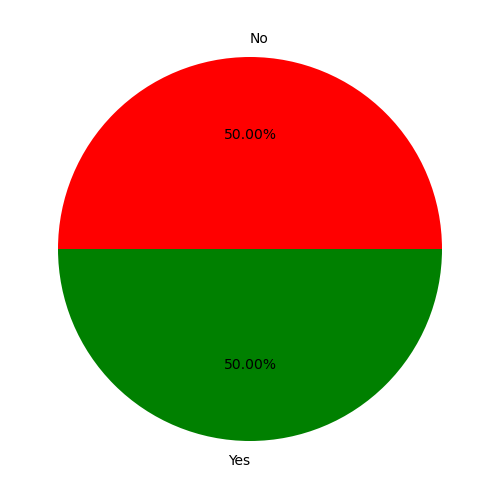

In [10]:
balanced= (sorted_df['TARGET'].value_counts()).to_dict()
approvals=[]
for count in balanced:
    approvals.append(balanced[count])

fig= plt.figure()
ax=fig.add_axes([0,0,1,1])
loan_approval_label=['No','Yes']
colors=['red','green']
ax.pie(approvals,labels= loan_approval_label, colors=colors,autopct='%1.2f%%')
plt.show()

# Feature Engineering:

- Extract relevant features from the dataset.
- Select features that are most relevant for predicting loan defaults.

In [149]:
sorted_df.shape

(4718, 123)

In [150]:
feature_names=sorted_df.columns[2:len(sorted_df)]
feature_values= []

for name in feature_names:
    feature_values.append(np.array(sorted_df[name]))
feature_data= (np.array(feature_values)).transpose()

target_data= np.array(sorted_df['TARGET'])
print(feature_data)

[[0. 0. 0. ... 0. 5. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 1. 1.]
 ...
 [0. 1. 0. ... 1. 2. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 2. 0.]]


In [151]:
k=15
selector = SelectKBest(score_func= chi2, k=k)
new_feature= selector.fit_transform(feature_data, target_data)

selected_indices = selector.get_support(indices=True)
selected_features = [feature_names[i] for i in selected_indices]
    
print('The selected indices indices is/are: ', selected_indices,'\n')
print('The selected features is/are: ',selected_features)

The selected indices indices is/are:  [ 1  5  6  7  8 10 15 16 17 18 19 31 38 41 93] 

The selected features is/are:  ['CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE']


# 5. Model Selection:

- Split the dataset into training and testing sets.
- Choose appropriate machine learning algorithms for classification.

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [152]:
X= np.array(sorted_df[selected_features])
y=sorted_df['TARGET']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

## Functions

In [67]:
def feature_coefficient():
    ml_model= model_x
    ml_model.fit(X_train,y_train)
                            
    coefficients=ml_model.coef_[0]  #Getting the coefficients or feature importance
    coefficients_names_zip= list(zip(selected_features,coefficients)) #Associate coefficients with feature names                                                                                                 

    feature_list=[]
    coefficient_list=[]

    for feature, coefficient in coefficients_names_zip:
        print(f'{feature}: {coefficient}')
        feature_list.append(feature)
        coefficient_list.append(coefficient)
        
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.bar(feature_list,coefficient_list)
    ax.set_xlabel('features')
    ax.set_ylabel('coefficients/ feature importance')
    ax.set_title('feature importance vs features')

    plt.xticks(rotation=45,ha='right')
    plt.show()

In [83]:
def model_evaluation():
    ml_model= model_x
    ml_model.fit(X_train,y_train)

    smote_sampler = SMOTE(random_state=9)
    pipeline = Pipeline(steps = [['smote', smote_sampler],
                                ['classifier', ml_model]])
    pipeline.fit(X_train, y_train)
    y_predict = pipeline.predict(X_test)

    #y_predict= model_x.predict(X_test)
    accuracy= accuracy_score(y_test,y_predict)
    precision= precision_score(y_test,y_predict)
    f1= f1_score(y_test,y_predict)

    
    print("-------------------------TEST SCORES-----------------------")
    print(f"Recall: { round(recall_score(y_test, y_predict)*100, 4) }")
    print(f"Precision: { round(precision_score(y_test, y_predict)*100, 4) }")
    print(f"F1-Score: { round(f1_score(y_test, y_predict)*100, 4) }")
    print(f"Accuracy score: { round(accuracy_score(y_test, y_predict)*100, 4) }")
    print(f"AUC Score: { round(roc_auc_score(y_test, y_predict)*100, 4) }")

In [94]:
#Visualizing Receiver Operating Characteristic - ROC curve
def roc_curves():
    ml_model= model_x
    ml_model.fit(X_train,y_train)
    class_probabilities = ml_model.predict_proba(X_test)
    preds = class_probabilities[:, 1]

    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # Printing AUC
    print(f"AUC for our classifier is: {roc_auc}")

    # Plotting the ROC
    plt.figure(figsize = (10, 10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Tree-based algorithms, such as random forests, play a crucial role in loan default prediction and credit risk assessment. These algorithms are adept at handling both classification and regression tasks, making them valuable in analyzing loan applications. By generating predictions based on training samples, they offer high accuracy and stability, crucial for identifying potential defaulters.

In the context of loan default prediction, essemble tree-based algorithms help minimize false negatives and false positives, ensuring robust risk assessment. While individual decision trees may overfit training data, random forests and XGBoost mitigate this issue by averaging predictions from multiple trees, resulting in improved prediction accuracy.

==> ***Use Random Forest Classifier and XGBoost Classifier***

The Random Forest approach is appropriate for classification and regression tasks on datasets with many entries and features that are likely to have missing values when we need a highly accurate result while avoiding overfitting.

Now, we train the model and perform the predictions.
We can try to use SMOTE sampling technique to address the class imbalance problem in the ratio of Negative (RISK_FLAG = 1) - Positive (RISK_FLAG = 0) labels.

# 6. Model Evaluation:

- Evaluating the performance of the trained model using appropriate evaluation metrics, i.e accuracy, precision and f1 score

-------------------------TEST SCORES-----------------------
Recall: 71.8487
Precision: 72.0
F1-Score: 71.9243
Accuracy score: 71.7161
AUC Score: 71.715
AUC for our classifier is: 0.7856828628887452


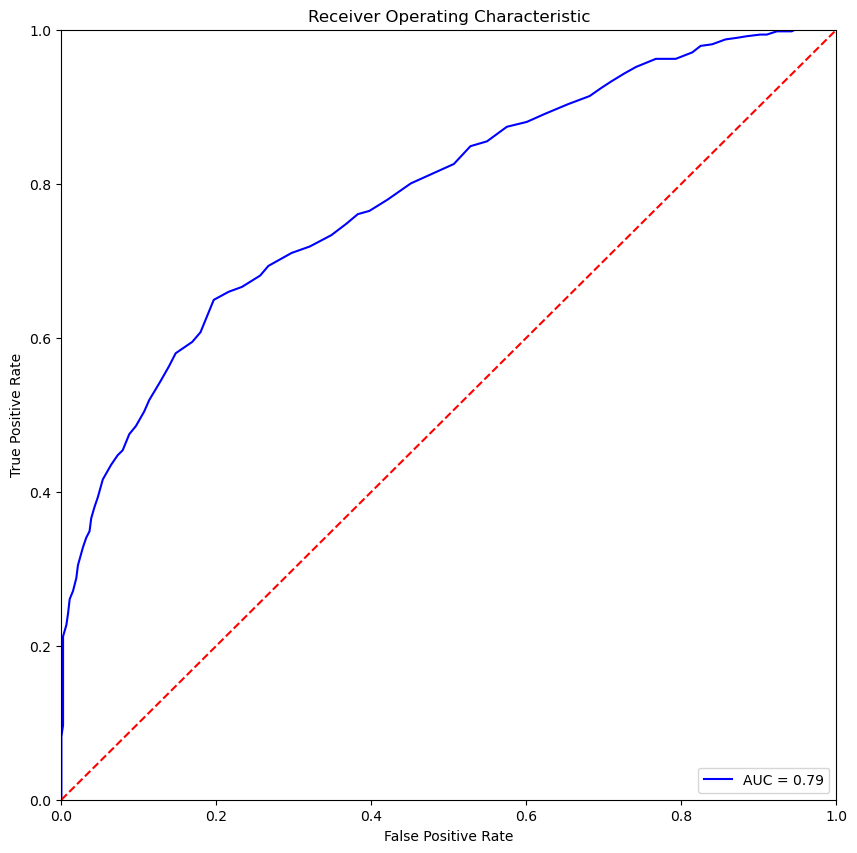

In [153]:
#Random Forest Classification
model_x = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
model_evaluation()
roc_curves()

-------------------------TEST SCORES-----------------------
Recall: 69.3277
Precision: 70.0637
F1-Score: 69.6938
Accuracy score: 69.5975
AUC Score: 69.5998
AUC for our classifier is: 0.7579993535875889


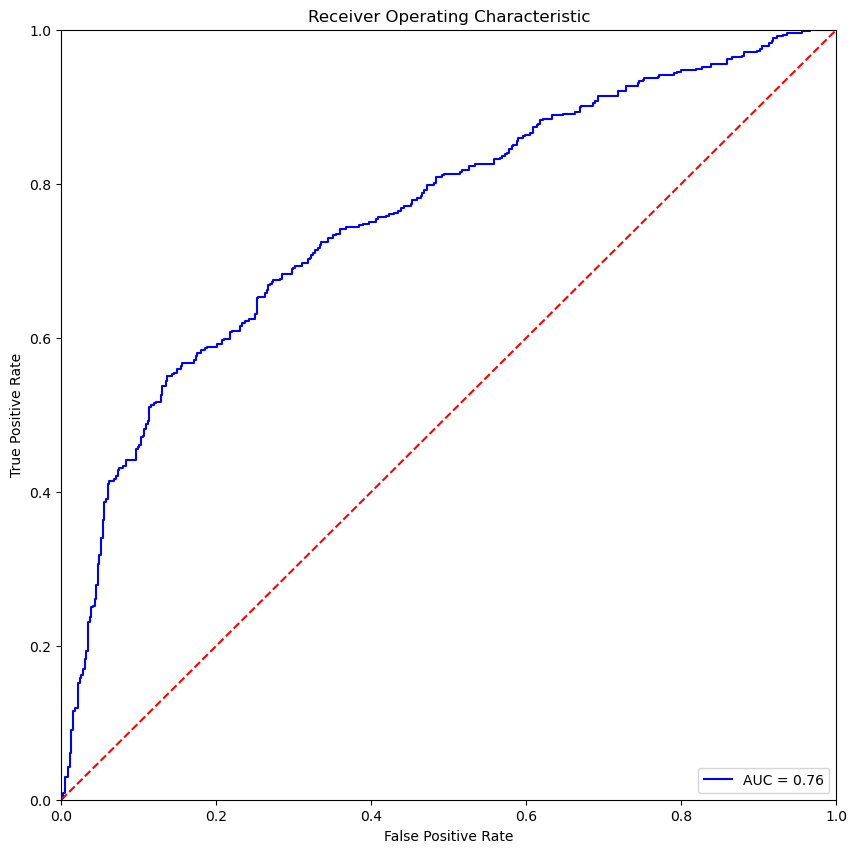

In [154]:
#XGBoost Classifier
model_x = XGBClassifier(n_estimators=500, use_label_encoder=False)
model_evaluation()
roc_curves()

c:\Users\Admin\anaconda3\envs\dsml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\anaconda3\envs\dsml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

-------------------------TEST SCORES-----------------------
Recall: 52.1008
Precision: 58.0796
F1-Score: 54.928
Accuracy score: 56.8856
AUC Score: 56.9265
AUC for our classifier is: 0.5727977088271206


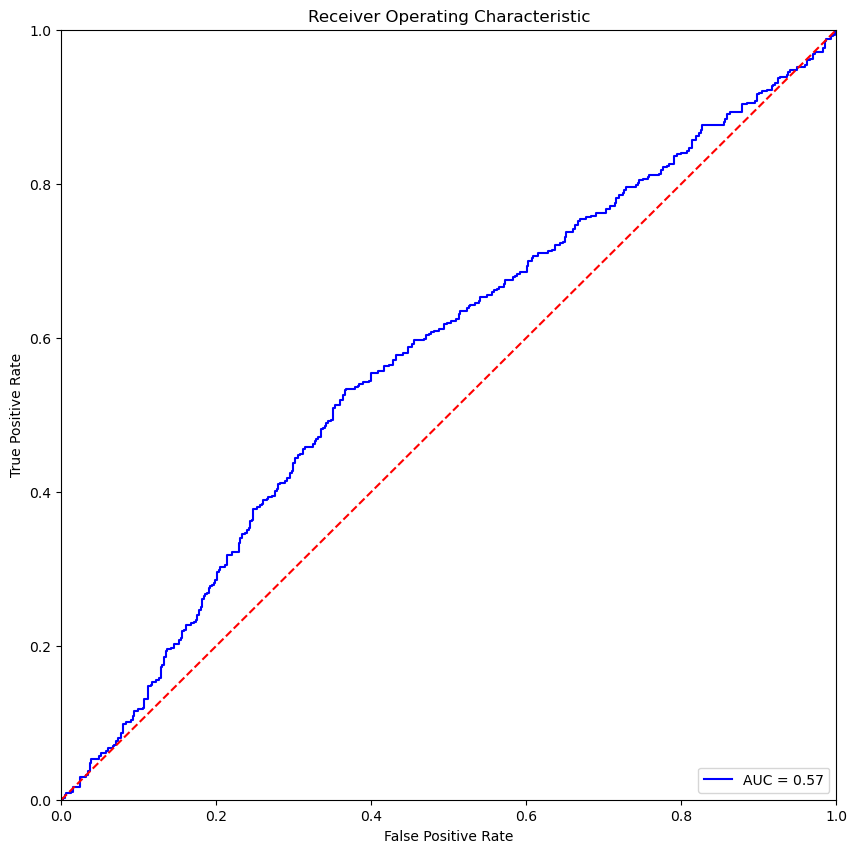

In [155]:
#Logistic Regression Classifier
model_x = LogisticRegression()
model_evaluation()
roc_curves()

# 7. Model Optimization - Hyperparameter Tuning (Random Forest Model)

 - Fine tune the model by adjusting hyperparameters to enhance its predictive performance
 - Using GridSearch for hyperparamater tuning in Random Forest Model to select the best params

In [143]:
# Define the parameter grid for tuning

# Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [2,4]
#Minimum number of samples required to split a node
min_samples_split = [2,5]
#Minimum number of samples required at each leafnode
min_samples_leaf = [1,2]


In [144]:
#Create a param grid
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf
              }
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [156]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm


# Define the classifier used
ml_model = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator = ml_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs=4)

# Create a progress bar
pbar = tqdm(total=len(grid_search.param_grid))

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Update the progress bar
pbar.update(1)

# Close the progress bar
pbar.close()

# Get the best hyperparameters from the grid search
grid_search.best_params_

#Check Accuracy
print(f'Train Accuracy - : {grid_search.score(X_train, y_train):.3f}')
print(f'Test Accuracy - : {grid_search.score(X_test, y_test):.3f}')

  0%|          | 0/5 [00:00<?, ?it/s]

Fitting 3 folds for each of 160 candidates, totalling 480 fits


c:\Users\Admin\anaconda3\envs\dsml\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
142 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\anaconda3\envs\dsml\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\anaconda3\envs\dsml\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Admin\anaconda3\envs\dsml\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "

Train Accuracy - : 0.687
Test Accuracy - : 0.627


# 8. Model Deployment:

- Deploying the optimised model to make predictions on new, unseen data.

In [157]:
best_model= grid_search.best_estimator_
new_predictions= best_model.predict(X_test)
target_response= (pd.DataFrame(new_predictions).value_counts()).to_dict()

for response in target_response:
    if  response==(0.0,):
        print(f'There are {target_response[response]} predicted clients without difficulties of loan payment')
    else:
        print(f'There are {target_response[response]} predicted clients with difficulties of loan payment')


There are 484 predicted clients with difficulties of loan payment
There are 460 predicted clients without difficulties of loan payment


# 9. Bias and Fairness Assessment
Evaluate and mitigate biases to ensure fair lending practices.

- Use the Aequitas library to assess bias and fairness.

- Specify the privileged and unprivileged groups based on sensitive attributes (e.g., race, gender).

- Calculate bias metrics and generate a bias report using Aequitas.

- Calculate fairness metrics and generate a fairness report using Aequitas.

In [134]:
from sklearn.metrics import classification_report
from aequitas.bias import Bias

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, best_model.predict(X_test)))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, best_model.predict(X_test))

# Load predictions and ground truth labels into Aequitas
df = pd.DataFrame({'score': best_model.predict(X_test), 'label_value': y_test})

# Define privileged and unprivileged groups based on sensitive attributes (e.g., race, gender)
privileged_groups = [{'race': 1}]  # Example: Privileged group based on race
unprivileged_groups = [{'race': 0}]  # Example: Unprivileged group based on race

# Assess bias using Aequitas
bias = Bias()
bias_report = bias.get_disparity_predefined_groups(df, original_df=None,
                                                     ref_groups_dict=None,
                                                     alpha=0.05,
                                                     check_significance=False,
                                                     mask_significance=False,
                                                     specified_metric='tpr',
                                                     privileged_groups=privileged_groups,
                                                     unprivileged_groups=unprivileged_groups)

# Print bias report
print("Bias Report:")
print(bias_report)

# Assess fairness using Aequitas
fairness = Fairness()
fairness_report = fairness.get_group_value_fairness(bias_report)

# Print fairness report
print("Fairness Report:")
print(fairness_report)

ModuleNotFoundError: No module named 'aequitas'

# Conclusion:

In conclusion, this project demonstrates the application of machine learning techniques to predict loan defaults effectively. By leveraging historical data and building robust predictive models, financial institutions can make more informed decisions and minimize potential losses due to defaults.